In [128]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [129]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [130]:
df = pd.read_csv("uk_renewable_energy.csv")
df.head()

,Year,Energy from renewable & waste sources,Total energy consumption of primary fuels and equivalents,Fraction from renewable sources and waste,Hydroelectric power,"Wind, wave, tidal",Solar photovoltaic,Geothermal aquifers,Landfill gas,Sewage gas,...,Municipal solid waste (MSW),Poultry litter,Straw,Wood,Charcoal,Liquid bio-fuels,Bioethanol,Biodiesel,Biomass,Cross-boundary Adjustment
0,1990,1.647,225.532,0.007,0.448,0.001,0.0,0.001,0.080,0.138,...,0.183,0.000,0.007,0.687,0.039,0.0,0.0,0.0,0.065,0.0
1,1991,1.634,231.288,0.007,0.398,0.001,0.0,0.001,0.105,0.151,...,0.185,0.000,0.007,0.687,0.036,0.0,0.0,0.0,0.065,0.0
2,1992,1.843,228.696,0.008,0.467,0.003,0.0,0.001,0.155,0.151,...,0.210,0.016,0.007,0.736,0.033,0.0,0.0,0.0,0.065,0.0
3,1993,1.862,231.368,0.008,0.370,0.019,0.0,0.001,0.162,0.158,...,0.268,0.043,0.007,0.736,0.034,0.0,0.0,0.0,0.065,0.0
4,1994,2.528,230.739,0.011,0.438,0.030,0.0,0.001,0.188,0.170,...,0.385,0.101,0.007,1.108,0.034,0.0,0.0,0.0,0.065,0.0


In [131]:
df.describe()

,Year,Energy from renewable & waste sources,Total energy consumption of primary fuels and equivalents,Fraction from renewable sources and waste,Hydroelectric power,"Wind, wave, tidal",Solar photovoltaic,Geothermal aquifers,Landfill gas,Sewage gas,...,Municipal solid waste (MSW),Poultry litter,Straw,Wood,Charcoal,Liquid bio-fuels,Bioethanol,Biodiesel,Biomass,Cross-boundary Adjustment
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,3.100000e+01,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2005.000000,7.812000,226.586161,0.037516,0.431323,1.299968,0.209581,1.000000e-03,1.023968,0.247387,...,1.118419,0.153613,0.092194,1.844097,0.048226,0.020419,0.169097,0.353065,0.594129,0.005742
std,9.092121,6.833277,20.912081,0.037430,0.067324,1.867693,0.392818,6.612745e-19,0.608756,0.095966,...,0.896538,0.067326,0.098076,1.545942,0.020654,0.047775,0.204388,0.428339,0.695856,0.006552
min,1990.000000,1.634000,169.439000,0.007000,0.278000,0.001000,0.000000,1.000000e-03,0.080000,0.138000,...,0.183000,0.000000,0.007000,0.687000,0.031000,0.000000,0.000000,0.000000,0.029000,0.000000
25%,1997.500000,2.828500,213.876500,0.011500,0.399000,0.065000,0.000000,1.000000e-03,0.359500,0.172000,...,0.549000,0.106500,0.007000,0.772000,0.034500,0.000000,0.000000,0.000000,0.065000,0.000000
50%,2005.000000,5.026000,230.886000,0.020000,0.438000,0.250000,0.001000,1.000000e-03,1.202000,0.193000,...,0.816000,0.176000,0.076000,1.108000,0.038000,0.000000,0.048000,0.027000,0.386000,0.001000
75%,2012.500000,10.380500,244.268500,0.048500,0.463500,2.074500,0.144500,1.000000e-03,1.555000,0.319000,...,1.221000,0.207500,0.098500,2.164500,0.051500,0.015000,0.405000,0.679500,0.665500,0.012500
max,2020.000000,24.472000,252.807000,0.144000,0.580000,6.481000,1.131000,1.000000e-03,1.758000,0.440000,...,3.367000,0.227000,0.338000,5.478000,0.107000,0.202000,0.492000,1.335000,2.469000,0.018000


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 21 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Year                                                       31 non-null     int64  
 1   Energy from renewable & waste sources                      31 non-null     float64
 2   Total energy consumption of primary fuels and equivalents  31 non-null     float64
 3   Fraction from renewable sources and waste                  31 non-null     float64
 4   Hydroelectric power                                        31 non-null     float64
 5   Wind, wave, tidal                                          31 non-null     float64
 6   Solar photovoltaic                                         31 non-null     float64
 7   Geothermal aquifers                                        31 non-null     float64
 8   Landfill gas

In [133]:
## data relabelling
df.columns = df.columns.str.strip()
df.rename(columns={'Total energy consumption of primary fuels and equivalents':'Total Consumed Primary Fuels'}, inplace=True)
df.rename(columns={'Energy from renewable & waste sources':'Total Consumed Renewable Energy'}, inplace=True)
df.rename(columns={'Fraction from renewable sources and waste':'Proportion of Renewable Consumed Energy'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     31 non-null     int64  
 1   Total Consumed Renewable Energy          31 non-null     float64
 2   Total Consumed Primary Fuels             31 non-null     float64
 3   Proportion of Renewable Consumed Energy  31 non-null     float64
 4   Hydroelectric power                      31 non-null     float64
 5   Wind, wave, tidal                        31 non-null     float64
 6   Solar photovoltaic                       31 non-null     float64
 7   Geothermal aquifers                      31 non-null     float64
 8   Landfill gas                             31 non-null     float64
 9   Sewage gas                               31 non-null     float64
 10  Biogas from autogen                      31 non-null

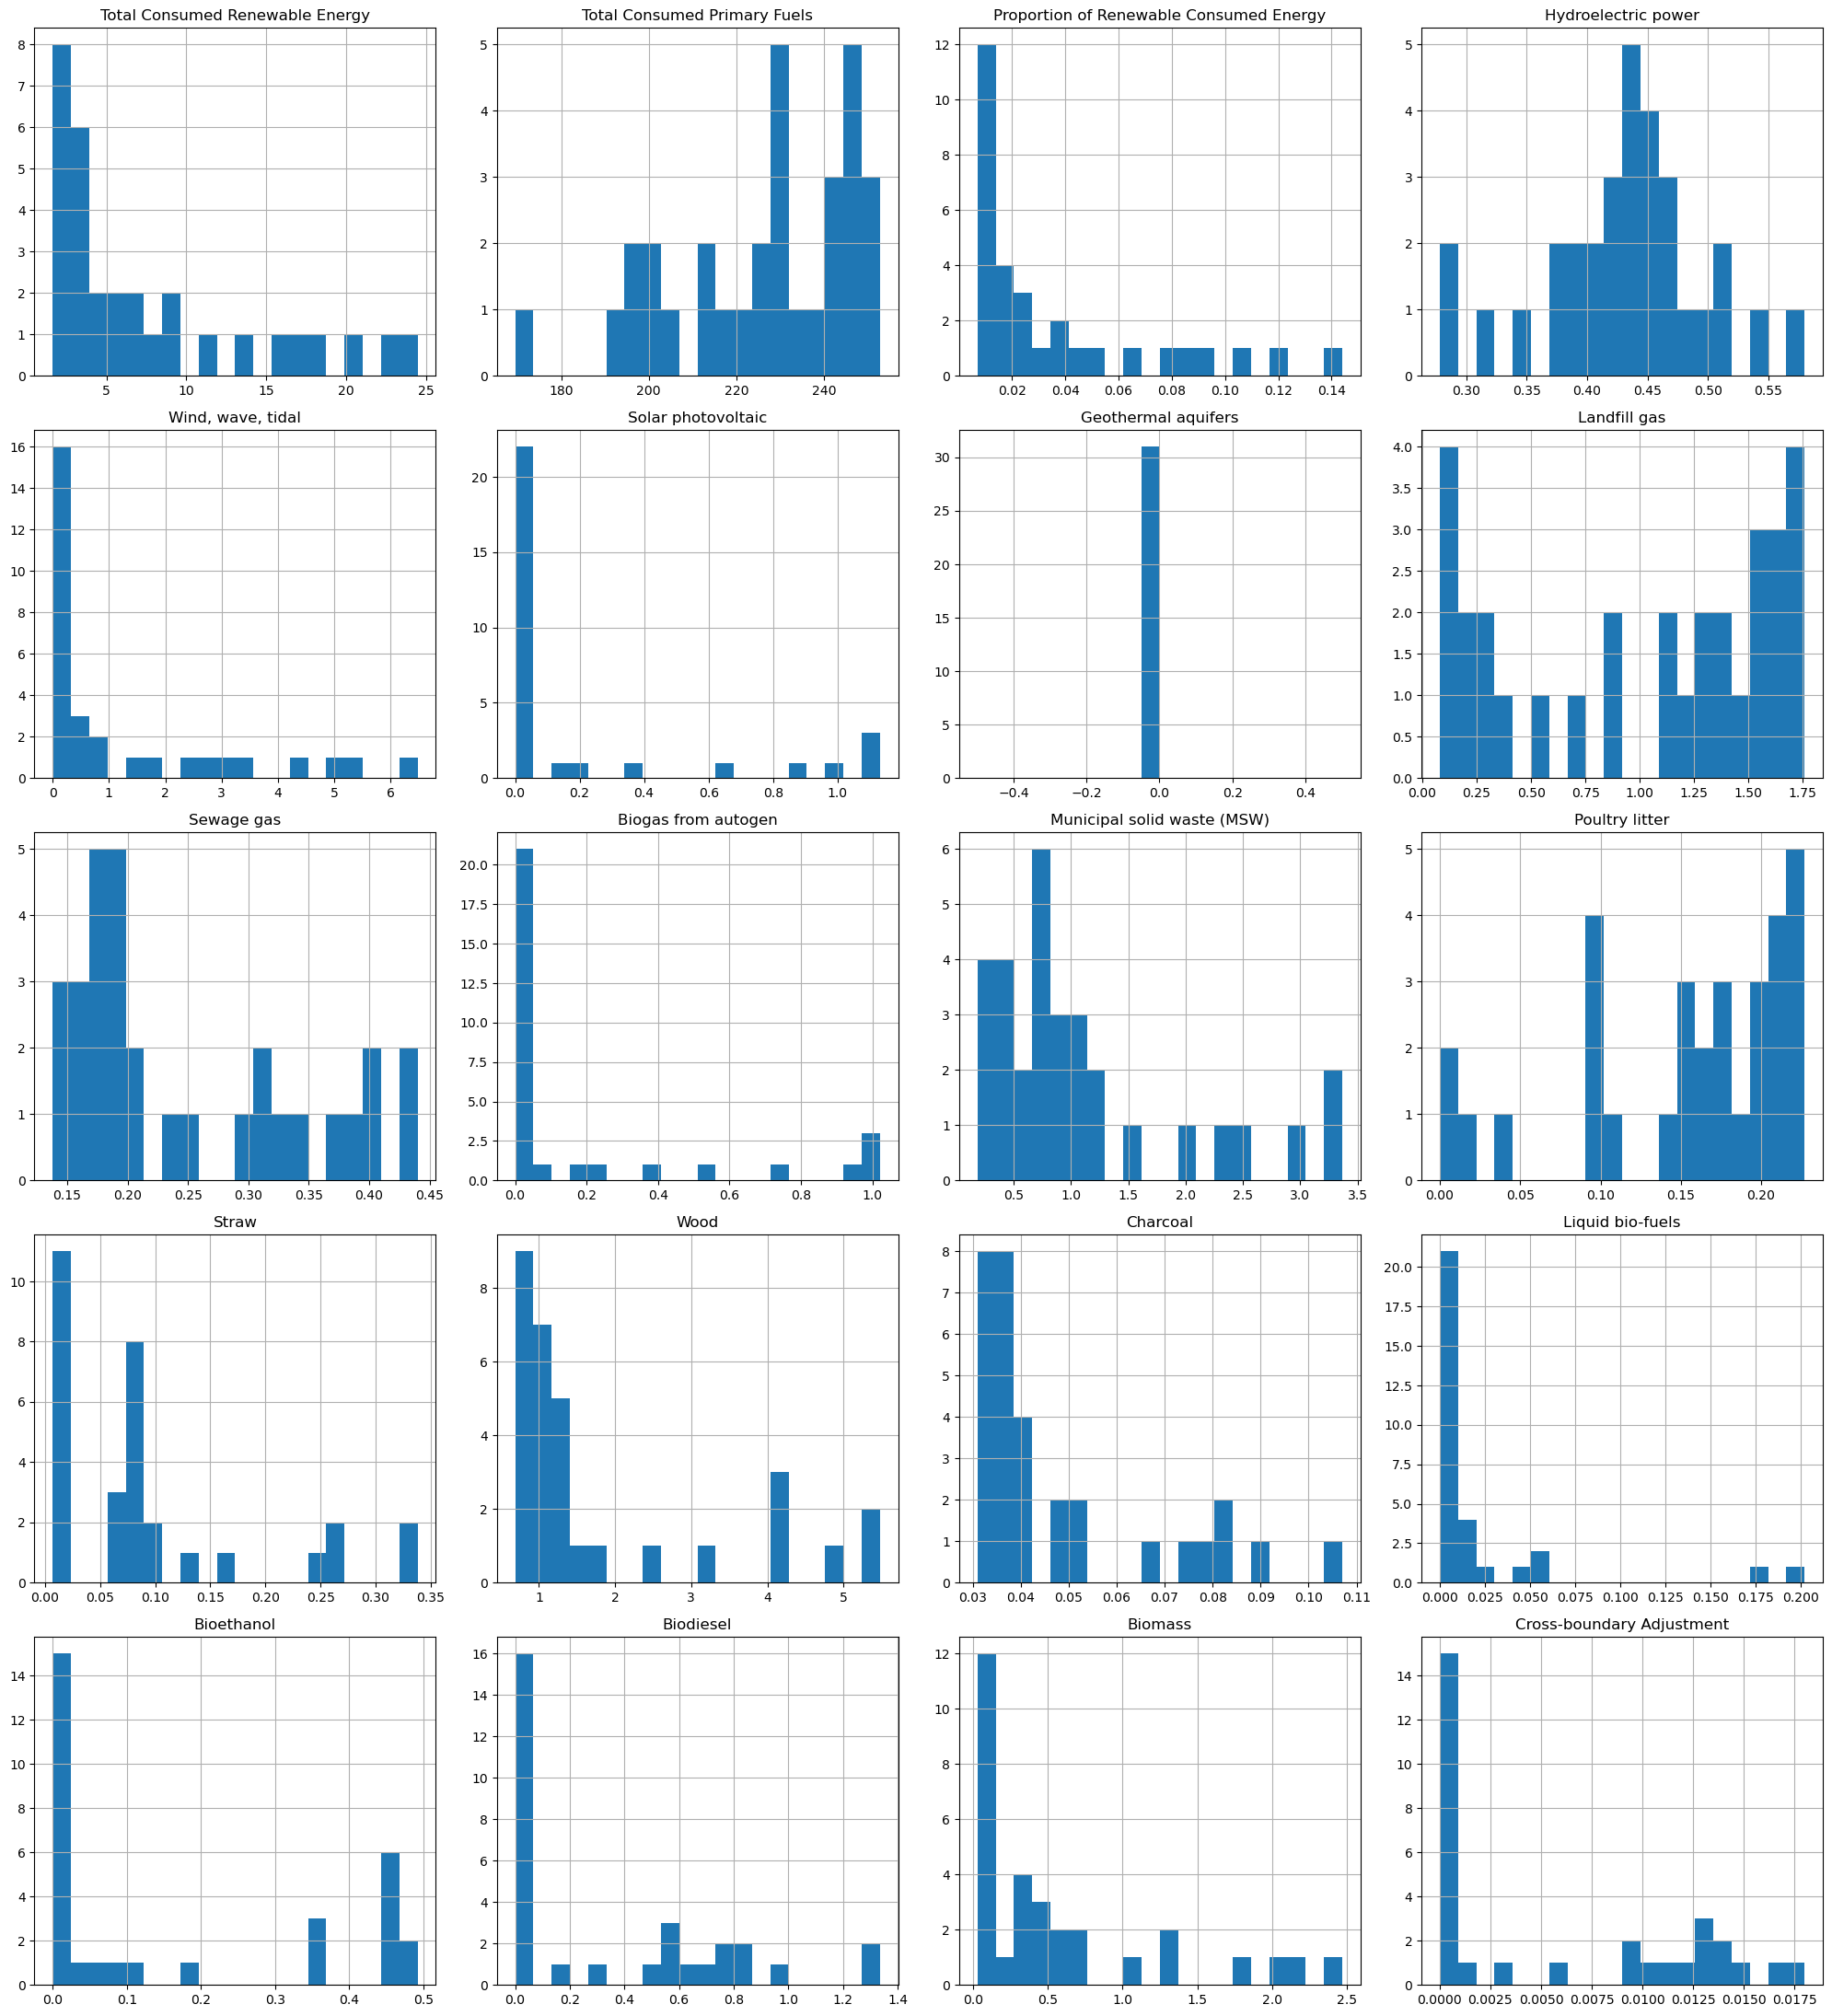

In [134]:
## histograms of data
df_no_year = df.drop("Year", axis = 'columns')
df_no_year.hist(figsize = (20, 22), bins = 20)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

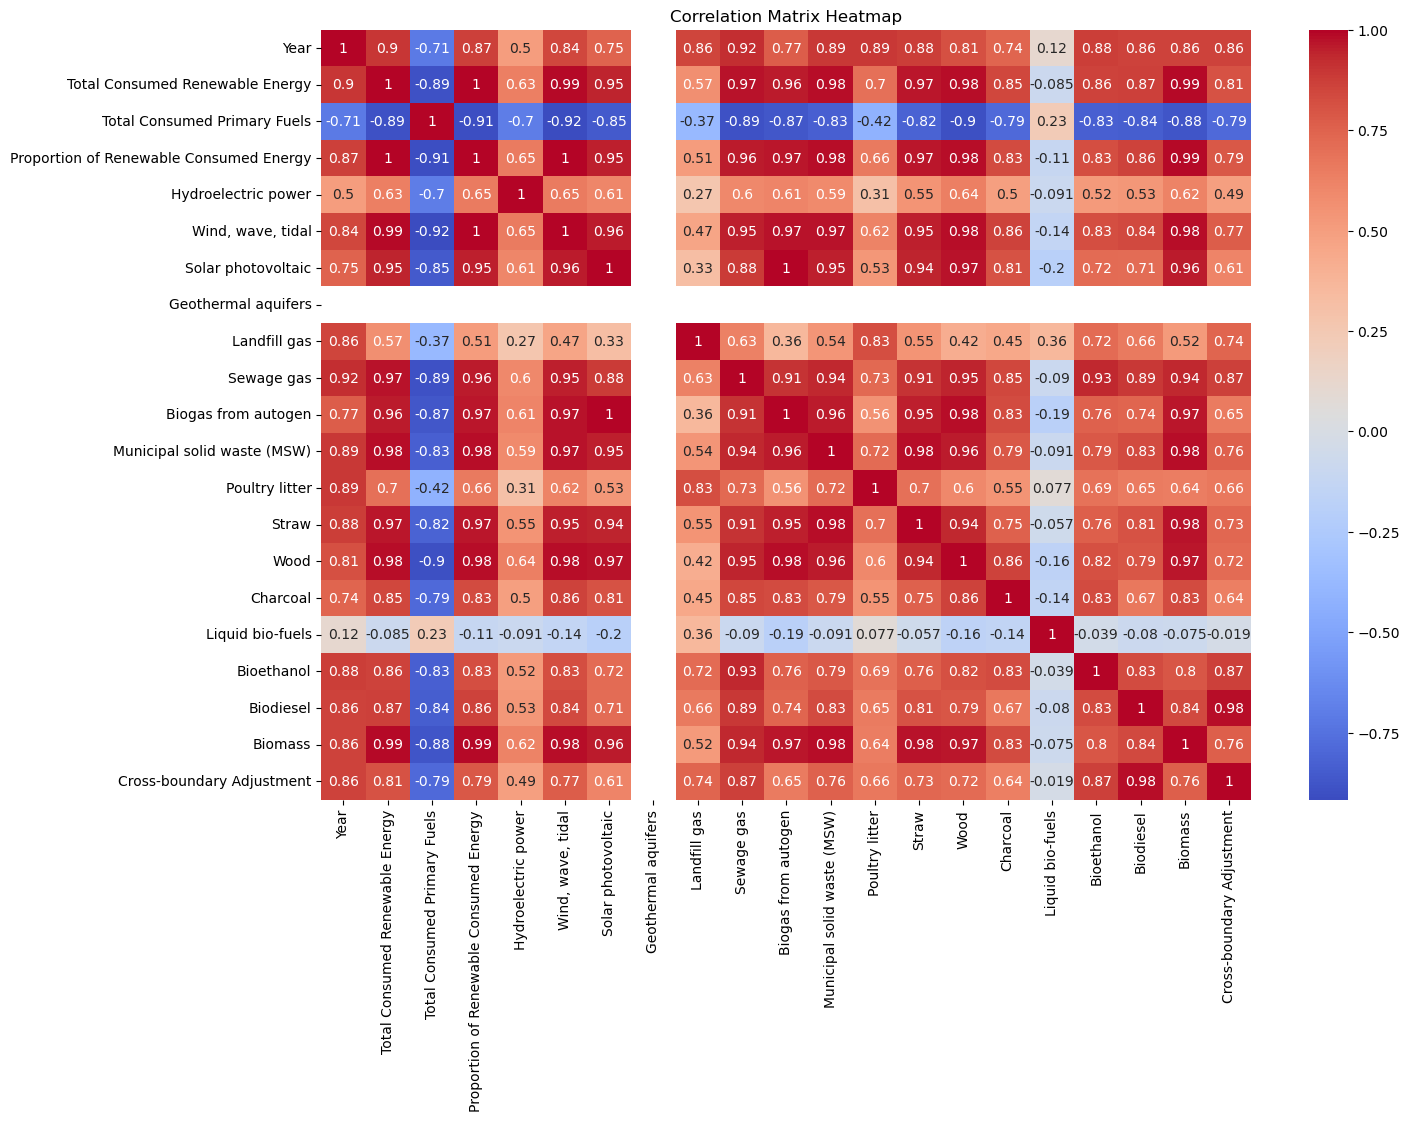

In [135]:
## correlation matrix
plt.figure(figsize=(15, 10))
corr_mat = df.corr()
sns.heatmap(corr_mat, cmap='coolwarm', annot=True)
plt.title("Correlation Matrix Heatmap")

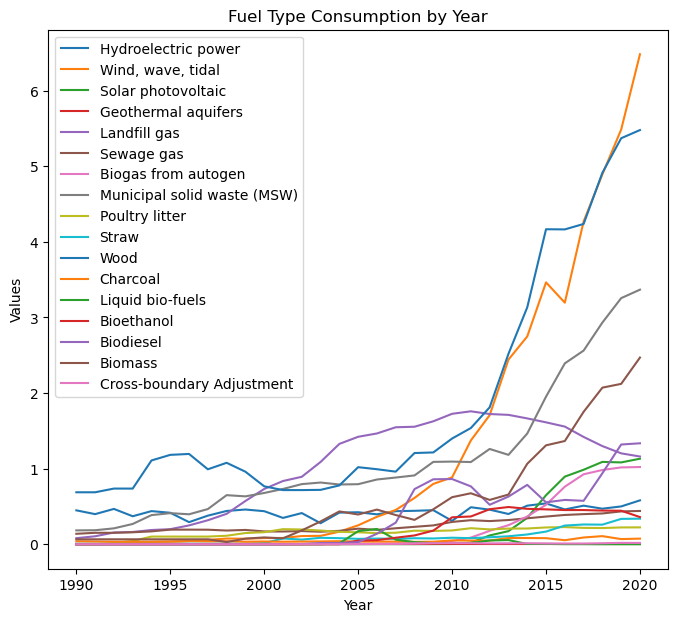

In [136]:
## plotting the evolution of renewable usage
plt.figure(figsize=(8, 7))

## only want to include specific types of renewable energy
columns_to_exclude = ['Total Consumed Renewable Energy', 'Total Consumed Primary Fuels', 'Proportion of Renewable Consumed Energy']

## loop through each column except year
for column in df.columns:
    if column != 'Year' and column not in columns_to_exclude:
        plt.plot(df['Year'], df[column], label=column)  ## plot the column against year
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Fuel Type Consumption by Year')
plt.legend()
plt.savefig('graph_no_background.png', transparent=True)
plt.show()

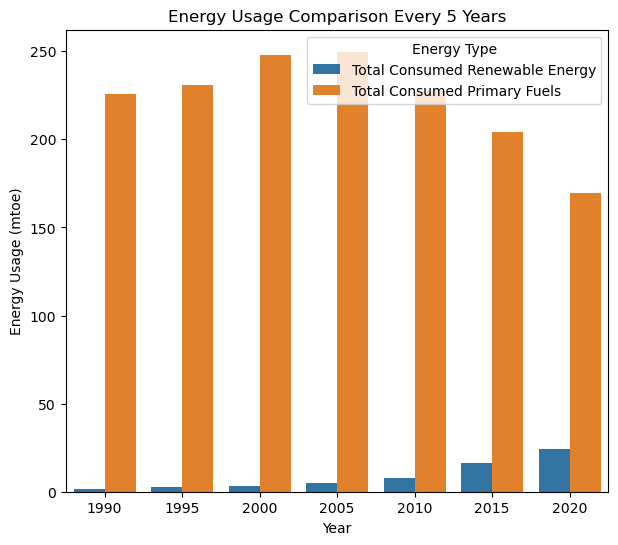

In [137]:
## bar chart for the evolutions of total energy usage - primary fuels vs renewables

## filter the data to have 5 year gaps
df_yeargaps = df[df['Year'].isin([1990, 1995, 2000, 2005, 2010, 2015, 2020])]

## select only the relevant energy columns and the year
df_energy = df_yeargaps[['Year', 'Total Consumed Renewable Energy', 'Total Consumed Primary Fuels']]

## melt the dataframe to long format for easier plotting with Seaborn
df_melted = df_energy.melt(id_vars='Year', 
                           value_vars=['Total Consumed Renewable Energy', 'Total Consumed Primary Fuels'],
                           var_name='Energy Type', value_name='Energy Usage')

## creat the plot
plt.figure(figsize=(7, 6))
sns.barplot(data=df_melted, x='Year', y='Energy Usage', hue='Energy Type')
plt.title('Energy Usage Comparison Every 5 Years')
plt.xlabel('Year')
plt.ylabel('Energy Usage (mtoe)')
plt.savefig('energy_barchart.png', transparent=True)
plt.show()


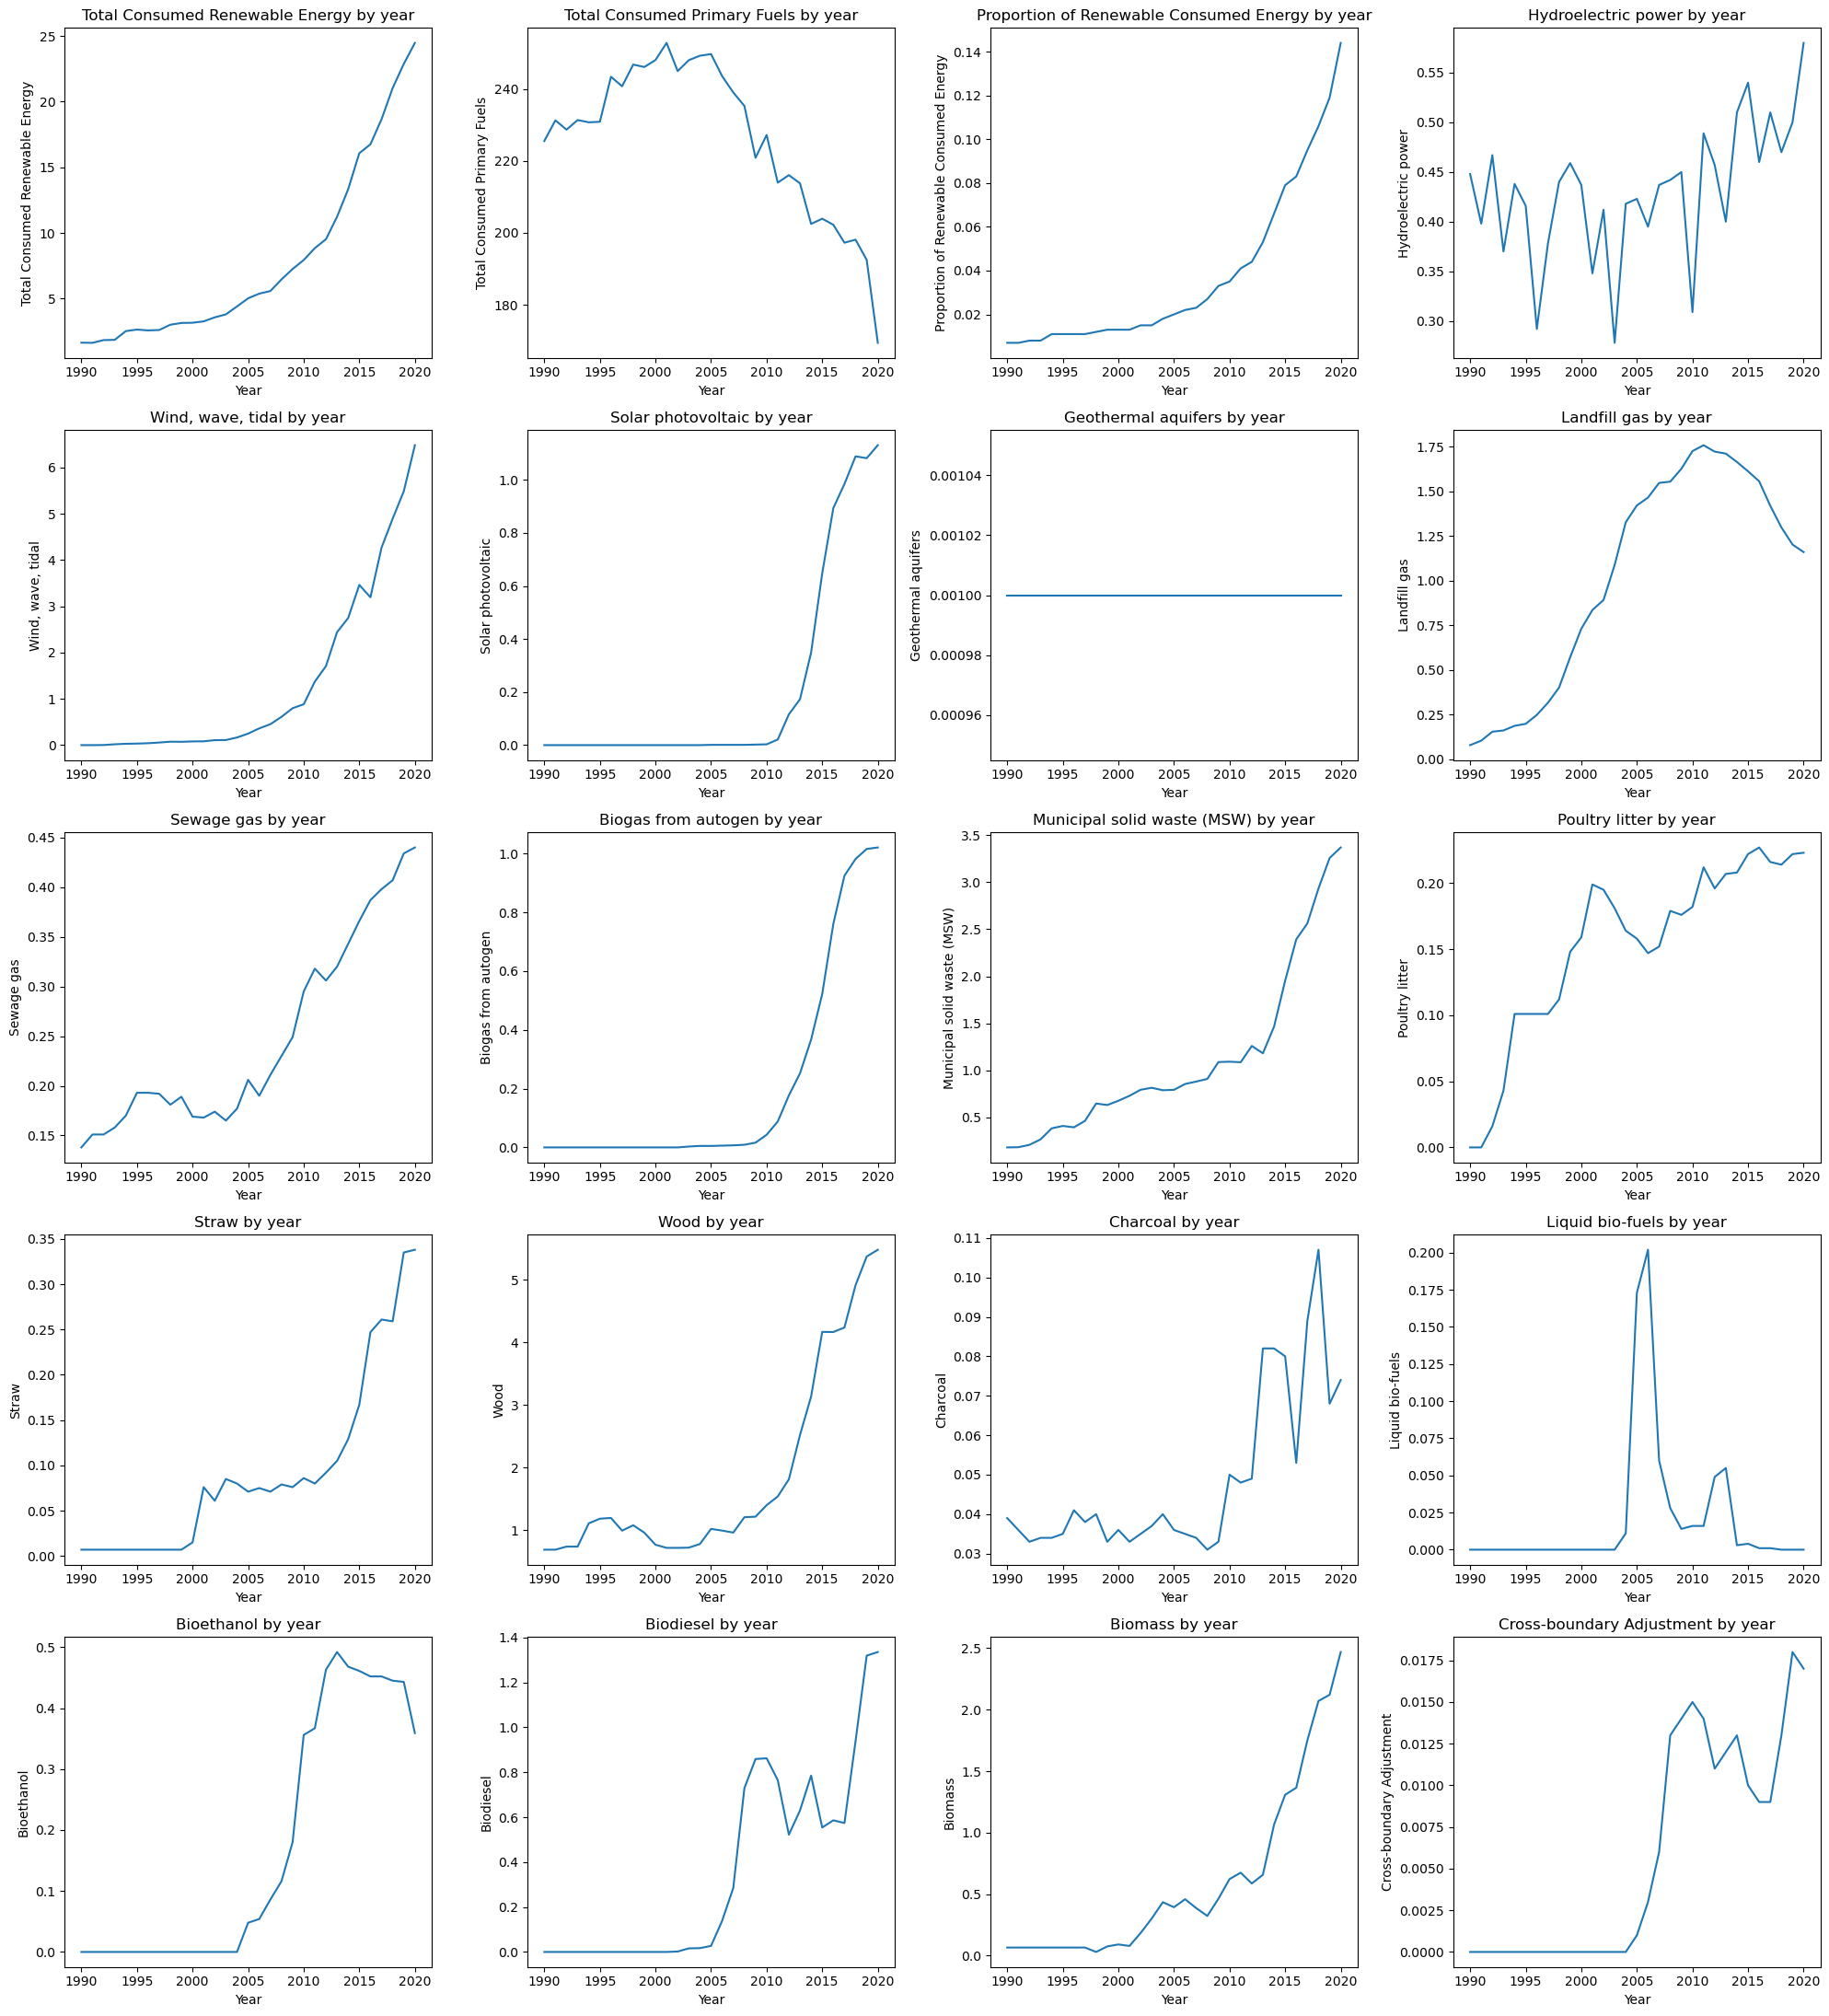

In [138]:
## plotting each column against year in one figure
fig, axs = plt.subplots(5, 4, figsize=(20,22))
axs = axs.flatten()

## create loop through all columns (i.e types energy types)
for i, column in enumerate(df_no_year.columns):
    ## plot each column against year
    axs[i].plot(df['Year'], df[column], label=column)
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel(column)
    axs[i].set_title(f'{column} by year')
plt.tight_layout()
plt.show()

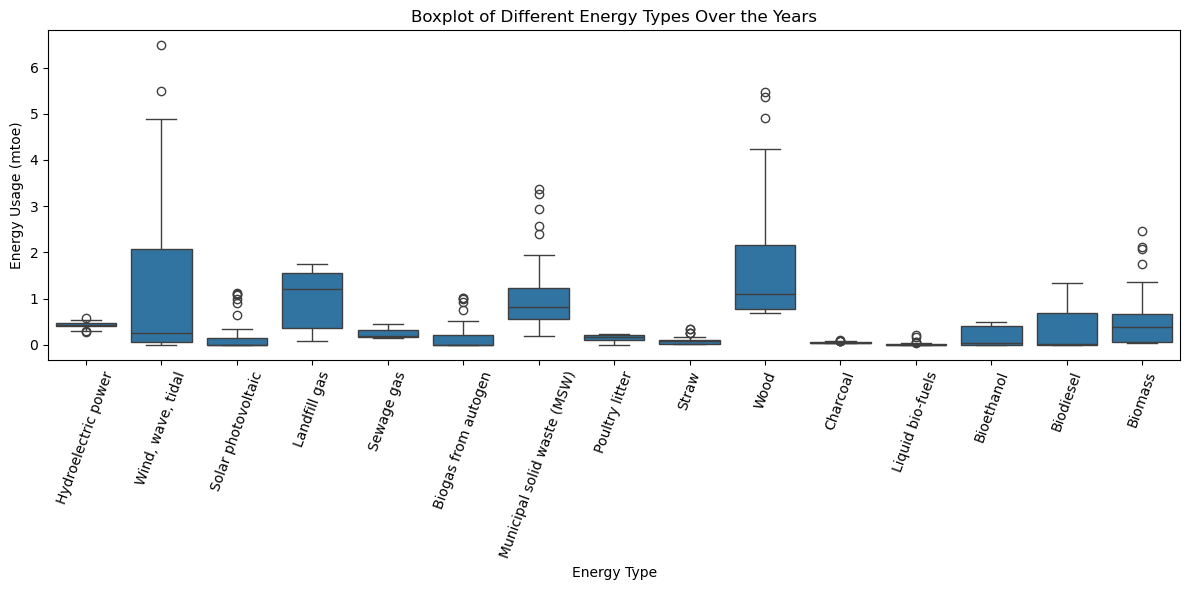

In [139]:
## boxplots for each renewable energy type

## selecting all the energy type columns (excluding 'Year' and other non-energy columns)
energy_columns = [ 
    'Hydroelectric power', 
    'Wind, wave, tidal', 
    'Solar photovoltaic', 
    'Landfill gas', 
    'Sewage gas', 
    'Biogas from autogen', 
    'Municipal solid waste (MSW)', 
    'Poultry litter', 
    'Straw', 
    'Wood', 
    'Charcoal', 
    'Liquid bio-fuels', 
    'Bioethanol', 
    'Biodiesel', 
    'Biomass'
]

## melting the dataframe so that energy types are in one column
df_melted = df.melt(id_vars=['Year'], value_vars=energy_columns, 
                    var_name='Energy Type', value_name='Energy Usage (mtoe)')

## create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Energy Type', y='Energy Usage (mtoe)', data=df_melted)
plt.xticks(rotation=70)
plt.title('Boxplot of Different Energy Types Over the Years')
plt.tight_layout()
plt.savefig('energy_boxplot.png', transparent=True)
plt.show()


In [140]:
## LINEAR REGRESSION, TRAIN TEST SPLIT, PREDICTIONS

## split to independent and dependent variables
X = df.drop('Proportion of Renewable Consumed Energy', axis='columns')
y = df['Proportion of Renewable Consumed Energy']

## scale the data using MaxAbs due to lots of zeros/sparse data
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)

## split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=32)

## create the models
linreg = LinearRegression()

## train model
linreg.fit(X_train, y_train)

## make predictions with model
y_pred = linreg.predict(X_test)

## dataframe of predicted values against test values and additng a 'residual' column
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

comparison_df['Residual'] = comparison_df['Actual'] - comparison_df['Predicted']

## print the comparison
comparison_df

,Actual,Predicted,Residual
0,0.007,0.006415,0.000585
13,0.015,0.016698,-0.001698
6,0.011,0.009883,0.001117
12,0.015,0.016223,-0.001223
27,0.095,0.087704,0.007296
15,0.020,0.018655,0.001345
26,0.083,0.070700,0.012300


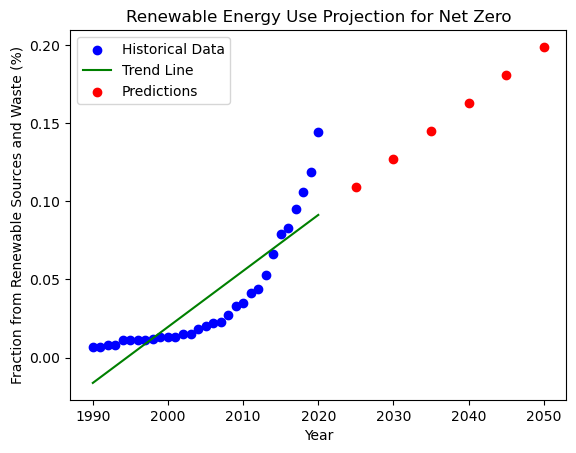

Predicted Fraction of Renewable Energy in 2030: 0.13%
Predicted Fraction of Renewable Energy in 2050: 0.16%


In [141]:
## LINEAR REGRESSION FOR FORECASTING

X = df['Year'].values.reshape(-1, 1)  # Years
y = df['Proportion of Renewable Consumed Energy'].values  # Renewable energy use

## fit the linear regression model
model = LinearRegression()
model.fit(X, y)

## predict the fraction of renewable energy for future years listed
future_years = np.array([2025, 2030, 2035, 2040, 2045, 2050]).reshape(-1, 1)
predictions = model.predict(future_years)

## plot historical data and predictions
plt.scatter(df['Year'], df['Proportion of Renewable Consumed Energy'], color='blue', label='Historical Data')
plt.plot(df['Year'], model.predict(X), color='green', label='Trend Line')
plt.scatter(future_years, predictions, color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Fraction from Renewable Sources and Waste (%)')
plt.title('Renewable Energy Use Projection for Net Zero')
plt.legend()
plt.savefig('linreg_predictions.png', transparent=True)
plt.show()

## print predictions for 2030 and 2050
print(f"Predicted Fraction of Renewable Energy in 2030: {predictions[1]:.2f}%")
print(f"Predicted Fraction of Renewable Energy in 2050: {predictions[3]:.2f}%")

In [142]:
## calculating r squared score to determine accuracy
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R-squared (Accuracy) of the model: {r2:.4f}")

R-squared (Accuracy) of the model: 0.7569


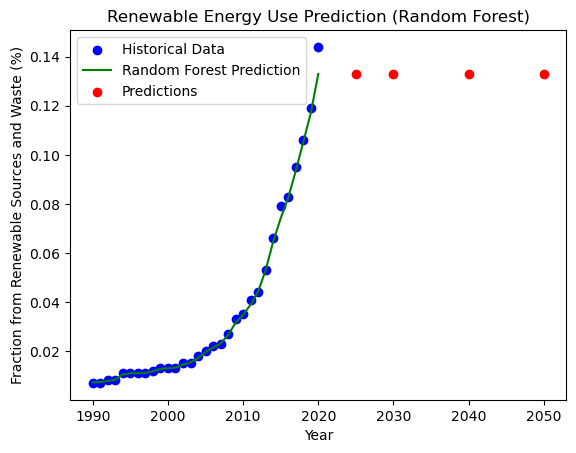

Predicted Fraction of Renewable Energy in 2030: 0.13%
Predicted Fraction of Renewable Energy in 2050: 0.13%


In [143]:
## RANDOM FOREST REGRESSION FOR FORECASTING

## fit the model and predict for future years
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)
future_years = np.array([2025, 2030, 2040, 2050]).reshape(-1, 1)
rf_predictions = rf_model.predict(future_years)

## plot historical data and predictions
plt.scatter(df['Year'], df['Proportion of Renewable Consumed Energy'], color='blue', label='Historical Data')
plt.plot(df['Year'], rf_model.predict(X), color='green', label='Random Forest Prediction')
plt.scatter(future_years, rf_predictions, color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Fraction from Renewable Sources and Waste (%)')
plt.title('Renewable Energy Use Prediction (Random Forest)')
plt.legend()
plt.savefig('ranfor_predictions.png', transparent=True)
plt.show()

## print predicted values for 2030 and 2050
print(f"Predicted Fraction of Renewable Energy in 2030: {rf_predictions[1]:.2f}%")
print(f"Predicted Fraction of Renewable Energy in 2050: {rf_predictions[3]:.2f}%")

In [144]:
## calculating r squared and mean squared error scores for accuracy
rf_predictions_train = rf_model.predict(X)
rf_r2 = r2_score(y, rf_predictions_train)
rf_rmse = np.sqrt(mean_squared_error(y, rf_predictions_train))
print(f"Random Forest R-squared: {rf_r2:.4f}")
print(f"Random Forest RMSE: {rf_rmse:.4f}")

Random Forest R-squared: 0.9961
Random Forest RMSE: 0.0023


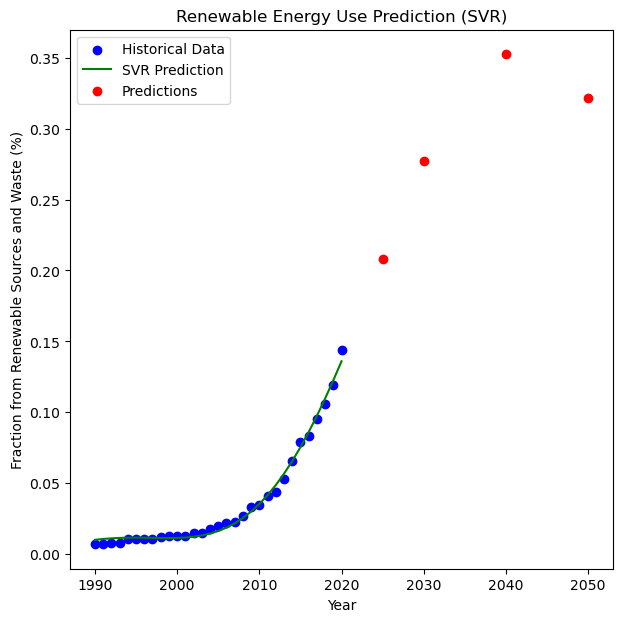

Predicted Fraction of Renewable Energy in 2030: 0.28%
Predicted Fraction of Renewable Energy in 2050: 0.32%


In [145]:
## SVM FOR FORECASTING

## scale the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)  # Scale the Year data
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()  # Scale the Fraction data

## fit the SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_scaled, y_scaled)

## predict for future years
future_years_scaled = scaler_X.transform(future_years)
svr_predictions_scaled = svr_model.predict(future_years_scaled)

## reverse the scaling for predictions
svr_predictions = scaler_y.inverse_transform(svr_predictions_scaled.reshape(-1, 1))

## plot historical data and predictions
plt.figure(figsize=(7,7))
plt.scatter(df['Year'], df['Proportion of Renewable Consumed Energy'], color='blue', label='Historical Data')
plt.plot(df['Year'], scaler_y.inverse_transform(svr_model.predict(X_scaled).reshape(-1, 1)), color='green', label='SVR Prediction')
plt.scatter(future_years, svr_predictions, color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Fraction from Renewable Sources and Waste (%)')
plt.title('Renewable Energy Use Prediction (SVR)')
plt.legend()
plt.savefig('svr_predictions.png', transparent=True)
plt.show()

## print predicted values for 2030 and 2050
print(f"Predicted Fraction of Renewable Energy in 2030: {svr_predictions[1][0]:.2f}%")
print(f"Predicted Fraction of Renewable Energy in 2050: {svr_predictions[3][0]:.2f}%")

In [146]:
## calculating r squared and mean squared error for accuarcy
svr_predictions_train_scaled = svr_model.predict(X_scaled)
svr_predictions_train = scaler_y.inverse_transform(svr_predictions_train_scaled.reshape(-1, 1))
svr_r2 = r2_score(y, svr_predictions_train)
svr_rmse = np.sqrt(mean_squared_error(y, svr_predictions_train))
print(f"SVR R-squared: {svr_r2:.4f}")
print(f"SVR RMSE: {svr_rmse:.4f}")

SVR R-squared: 0.9936
SVR RMSE: 0.0029


c:\Users\natal\anaconda3\envs\new\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


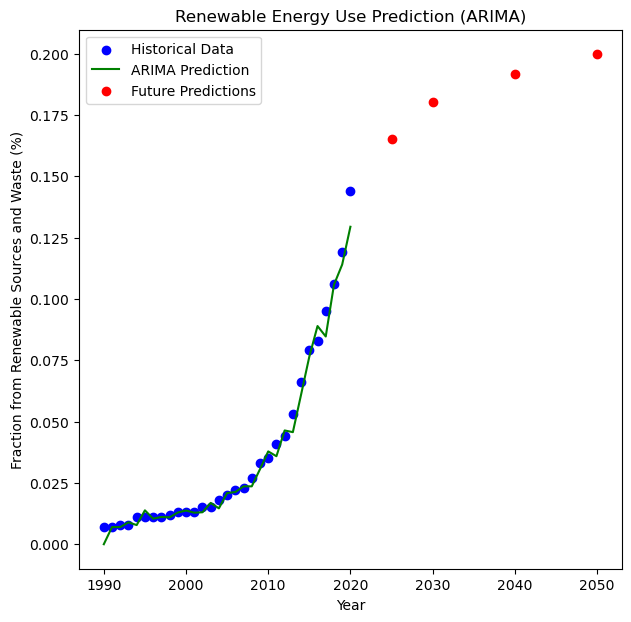

Predicted Fraction of Renewable Energy in 2030: 0.18%
Predicted Fraction of Renewable Energy in 2050: 0.20%


In [147]:
## TIME-SERIES FORECASTING (ARIMA)

## create ARIMA model
arima_model = ARIMA(y, order=(1, 1, 1))
arima_result = arima_model.fit()

## Forecast future values
future_steps = [2025, 2030, 2040, 2050]  # Future years
forecast_years = np.array([step - df['Year'].iloc[-1] for step in future_steps])  # Get the steps from the last year

arima_forecast = arima_result.forecast(steps=len(future_steps))

## plot historical data and ARIMA predictions
plt.figure(figsize=(7,7))
plt.scatter(df['Year'], df['Proportion of Renewable Consumed Energy'], color='blue', label='Historical Data')
plt.plot(df['Year'], arima_result.predict(start=0, end=len(y)-1), color='green', label='ARIMA Prediction')
plt.scatter(future_steps, arima_forecast, color='red', label='Future Predictions')
plt.xlabel('Year')
plt.ylabel('Fraction from Renewable Sources and Waste (%)')
plt.title('Renewable Energy Use Prediction (ARIMA)')
plt.legend()
plt.savefig('ARIMA_predictions.png', transparent=True)
plt.show()

# Print predicted values for 2030 and 2050
print(f"Predicted Fraction of Renewable Energy in 2030: {arima_forecast[1]:.2f}%")
print(f"Predicted Fraction of Renewable Energy in 2050: {arima_forecast[3]:.2f}%")


In [148]:
## calculating r squared and mean squared error for accuarcy
arima_predictions_train = arima_result.predict(start=0, end=len(y)-1)
arima_r2 = r2_score(y, arima_predictions_train)
arima_rmse = np.sqrt(mean_squared_error(y, arima_predictions_train))
print(f"ARIMA R-squared: {arima_r2:.4f}")
print(f"ARIMA RMSE: {arima_rmse:.4f}")

ARIMA R-squared: 0.9855
ARIMA RMSE: 0.0044


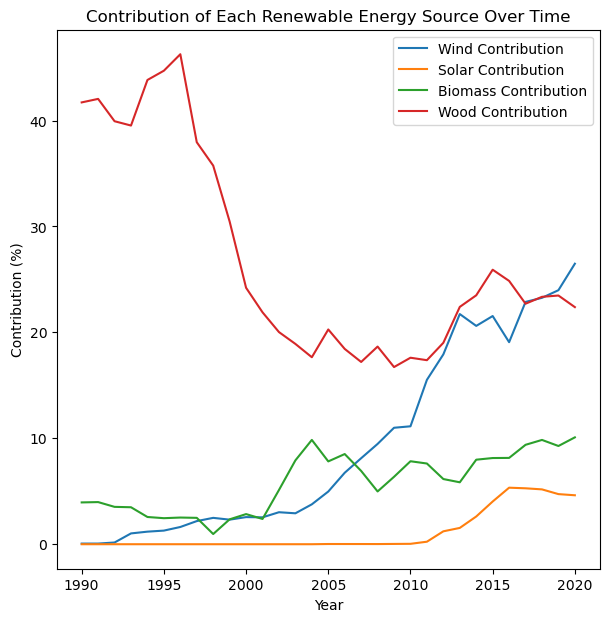

In [149]:
## analysing the contributions of top 4 renewable energy types

## calculate the contribution of each energy source to total renewable energy produced
df['Wind Contribution'] = df['Wind, wave, tidal'] / df['Total Consumed Renewable Energy'] * 100
df['Solar Contribution'] = df['Solar photovoltaic'] / df['Total Consumed Renewable Energy'] * 100
df['Biomass Contribution'] = df['Biomass'] / df['Total Consumed Renewable Energy'] * 100
df['Wood Contribution'] = df['Wood'] / df['Total Consumed Renewable Energy'] * 100

## create a figure and axis object using subplots
fig, ax = plt.subplots(figsize=(7, 7))

## plot the contribution of each energy source
df.plot(x='Year', y=['Wind Contribution', 'Solar Contribution', 'Biomass Contribution', 'Wood Contribution'], kind='line', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Contribution (%)')
ax.set_title('Contribution of Each Renewable Energy Source Over Time')
ax.legend()
plt.savefig('contribution_line.png', transparent=True)
plt.show()

In [150]:
## calculating growth rathes of top 4 renewable energy type

## for each energy source, fit a linear regression model to understand the trend
reg_wind = LinearRegression().fit(X, df['Wind, wave, tidal'])
reg_solar = LinearRegression().fit(X, df['Solar photovoltaic'])
reg_biomass = LinearRegression().fit(X, df['Biomass'])
reg_wood = LinearRegression().fit(X, df['Wood'])

## get the slopes (growth rates) of each source
slope_wind = reg_wind.coef_[0]
slope_solar = reg_solar.coef_[0]
slope_biomass = reg_biomass.coef_[0]
slope_wood = reg_wood.coef_[0]

## print the growth rates for each source
print(f"Wind growth rate: {slope_wind}")
print(f"Solar growth rate: {slope_solar}")
print(f"Biomass growth rate: {slope_biomass}")
print(f"Wood growth rate: {slope_wood}")

Wind growth rate: 0.17321169354838703
Solar growth rate: 0.03221612903225805
Biomass growth rate: 0.066095564516129
Wood growth rate: 0.13821572580645158
